In [204]:
import os
import json

In [205]:
path = '/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/train/amount/gt.json'

In [206]:
chars = set()
with open(path,encoding='utf-8') as f:
    data = json.loads(f.read())
    for k, v in data.items():
        for c in v:
            chars.add(c)

chars

{'万',
 '亿',
 '仟',
 '伍',
 '佰',
 '元',
 '分',
 '叁',
 '圆',
 '壹',
 '拾',
 '捌',
 '整',
 '柒',
 '正',
 '玖',
 '肆',
 '角',
 '贰',
 '陆',
 '零'}

In [207]:
''.join(chars)

'万捌整元壹伍拾叁肆佰玖正分圆柒陆角仟贰亿零'

In [208]:
# 图片比例
def read_images(path,name):
    keys = []
    if name is None:
        paths = os.listdir(path)
        paths = list(filter(lambda x:x.endswith('.jpg'), paths))
        return [os.path.join(path,p) for p in paths]
    else:
        file_path = os.path.join(path,name)
        with open(file_path,encoding='utf-8') as f:
            data = json.loads(f.read())
            for k, v in data.items():
                keys.append(os.path.join(path,f'images/{k}'))
        return keys
        

In [209]:
ori_path = '/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/train/amount'
image_paths = []
train_paths = []
keys = read_images(ori_path,'gt.json')
image_paths.extend(keys)
train_paths.extend(keys)

In [210]:
ori_path = '/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/train/date'
keys = read_images(ori_path,'gt.json')
image_paths.extend(keys)
train_paths.extend(keys)

In [211]:
ori_path = '/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/test/amount/images'
test_paths = []
keys = read_images(ori_path,None)
image_paths.extend(keys)
test_paths.extend(keys)

In [212]:
ori_path = '/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/test/date/images'
keys = read_images(ori_path,None)
image_paths.extend(keys)
test_paths.extend(keys)

In [213]:
len(image_paths), len(train_paths), len(test_paths)

(10000, 8000, 2000)

In [214]:
image_paths[1]

'/Users/sjhuang/Documents/docs/dataset/aiwin_dataset/ocr/2021A_T1_Task1_dataset/train/amount/images/8bb39447760a31c801762283f9dd63cb.jpg'

In [215]:
import PIL
import PIL.Image as Image
from tqdm import tqdm

In [216]:
def col_ratios(paths):
    ratios = []
    for image_path in tqdm(paths):
        img = Image.open(image_path)
        w,h = img.size
        ratios.append(w/float(h))
    return ratios

In [217]:
train_ratios = col_ratios(train_paths)
test_ratios = col_ratios(test_paths)

100%|██████████| 2000/2000 [00:00<00:00, 2012.64it/s]


In [218]:
import matplotlib.pyplot as plt


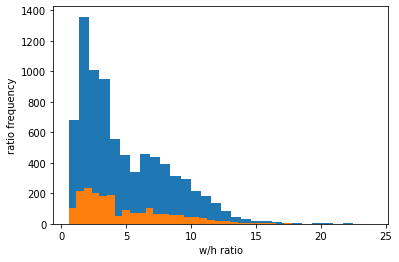

In [219]:
plt.hist(train_ratios,bins=30)
plt.hist(test_ratios,bins=30)
plt.xlabel('w/h ratio')
plt.ylabel('ratio frequency')
plt.show()

In [220]:
filter_train_ratios = list(filter(lambda x:x <= 12, train_ratios))
filter_test_ratios = list(filter(lambda x:x <= 12,test_ratios))
len(filter_train_ratios), len(filter_test_ratios)

(7716, 1931)

In [221]:
img = Image.open(image_paths[0])
img,img.size

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=302x48 at 0x7FA153BA5700>,
 (302, 48))

In [249]:
imgH = 32 
imgW = 336
w, h = img.size
ratio = h/float(imgH)
imgb = None
imga = None
w_ = int(w/ratio)
print(w,h,w_,ratio)
if w_ > imgW:
    w_ = imgW
    imga = img.resize((w_,imgH))
else:
    img = img.resize((w_,imgH))
    new_img = Image.new('RGB',(imgW,imgH),color=(255,255,255))
    new_img.paste(img,((imgW - w_)//2, (imgH - h)//2))
    imgb = new_img


201 32 201 1.0


In [245]:
# 302*32-48*201


In [246]:
imga

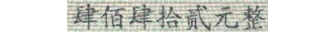

In [250]:
imgb

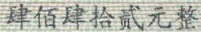

In [248]:
img